In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data generation
np.random.seed(0)
torch.manual_seed(0)
x = np.random.uniform(-1, 1, size=(100, 1))
y = np.abs(x)

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [3]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(input_size, 1, bias=True)   # XB1 + B0 (bias)
        self.linear2 = nn.Linear(input_size, 1, bias=False)  # XB2
        self.leaky_relu = nn.LeakyReLU(0.01)                 # Leaky ReLU module

    def forward(self, X):
        linear_part1 = self.linear1(X)  # XB1 + B0 (bias)
        linear_part2 = self.linear2(X)  # XB2
        y = linear_part1 + self.leaky_relu(linear_part2)
        return y

In [4]:
def train_model(x_tensor, y_tensor):
    model = SimpleNN(1)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.1)

    # Early stopping parameters
    patience = 5000
    best_loss = float('inf')
    counter = 0

    # Training loop
    num_epochs = 100000
    for epoch in range(num_epochs):
        model.train()
        
        # Forward pass
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            counter = 0  # Reset counter if the loss improves
        else:
            counter += 1
        
        if counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break
    
    return model

Early stopping at epoch 6530


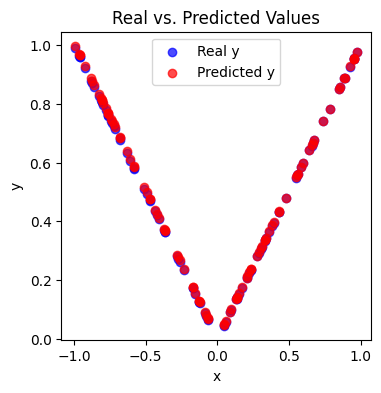

In [5]:
# Test the model
model = train_model(x_tensor, y_tensor)
model.eval()
with torch.no_grad():
    test_y = model(x_tensor).numpy()  # Convert to numpy array for plotting

# Plot the results (x1, y) and (x1, test_y)
plt.figure(figsize=(4, 4))
plt.scatter(x, y_tensor.numpy(), label='Real y', color='blue', alpha=0.7)  # Plot real y
plt.scatter(x, test_y, label='Predicted y', color='red', alpha=0.7)        # Plot predicted y
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real vs. Predicted Values')
plt.legend()
plt.show()

In [6]:
# Print all parameters with names
for name, param in model.named_parameters():
    print(f"Parameter name: {name} \t Parameter value: {param.data.numpy()}")

Parameter name: linear1.weight 	 Parameter value: [[1.0176541]]
Parameter name: linear1.bias 	 Parameter value: [0.00254746]
Parameter name: linear2.weight 	 Parameter value: [[-2.0227475]]
